In [73]:
import pandas as pd
import numpy as np

In [94]:
data = pd.read_csv('Downloads/Insurance Dataset.csv')


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

# Removing Null & Duplicated Rows

In [75]:
data.duplicated().sum()

4814

In [37]:
data.isna().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [38]:
len(data)

1048575

In [102]:
data = data.drop_duplicates()

In [103]:
data = data.dropna()

In [41]:
data.isna().sum()

Area_Service                             0
Hospital County                          0
Hospital Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [42]:
data.duplicated().sum()

0

# EDA & Data Cleaning

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041265 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Hospital County                        1041265 non-null  object 
 2   Hospital Id                            1041265 non-null  float64
 3   Age                                    1041265 non-null  object 
 4   Gender                                 1041265 non-null  object 
 5   Cultural_group                         1041265 non-null  object 
 6   ethnicity                              1041265 non-null  object 
 7   Days_spend_hsptl                       1041265 non-null  object 
 8   Admission_type                         1041265 non-null  object 
 9   Home or self care,                     1041265 non-null  object 
 10  ccs_diagnosis_code                     104

In [45]:
data.select_dtypes(exclude='number').columns

Index(['Area_Service', 'Hospital County', 'Age', 'Gender', 'Cultural_group',
       'ethnicity', 'Days_spend_hsptl', 'Admission_type', 'Home or self care,',
       'apr_drg_description', 'Surg_Description', 'Abortion',
       'Emergency dept_yes/No'],
      dtype='object')

In [84]:
data[['Days_spend_hsptl','Age','apr_drg_description','Admission_type','Surg_Description']]

,Days_spend_hsptl,Age,apr_drg_description,Admission_type,Surg_Description
0,4,30 to 49,Other pneumonia,Elective,Medical
1,4,70 or Older,Cellulitis & other skin infections,Urgent,Medical
2,3,30 to 49,Other pneumonia,Urgent,Medical
3,1,0 to 17,Other pneumonia,Urgent,Medical
4,3,70 or Older,Other pneumonia,Elective,Medical
...,...,...,...,...,...
1048570,6,70 or Older,Cardiac arrhythmia & conduction disorders,Emergency,Medical
1048571,2,0 to 17,Other infectious & parasitic diseases,Emergency,Medical
1048572,13,50 to 69,Hepatic coma & other major acute liver disorders,Emergency,Medical
1048573,2,30 to 49,"Inguinal, femoral & umbilical hernia procedures",Emergency,Surgical


In [85]:
data['Days_spend_hsptl'].value_counts()

2      232527
3      189545
1      154202
4      113534
5       73580
        ...  
108        20
116        20
110        19
101        15
113         7
Name: Days_spend_hsptl, Length: 120, dtype: int64

In [86]:
data['Days_spend_hsptl'].unique()

array(['4', '3', '1', '2', '5', '6', '14', '12', '9', '8', '10', '7',
       '22', '11', '16', '15', '25', '13', '17', '28', '18', '19', '23',
       '38', '20', '24', '26', '21', '27', '30', '29', '39', '87', '35',
       '37', '32', '55', '56', '49', '110', '69', '75', '42', '51', '47',
       '45', '46', '40', '34', '79', '43', '120 +', '65', '41', '31',
       '50', '59', '44', '36', '70', '115', '58', '94', '33', '68', '67',
       '54', '80', '85', '95', '78', '91', '88', '48', '52', '63', '57',
       '74', '64', '53', '62', '97', '72', '118', '81', '90', '86', '106',
       '112', '105', '114', '66', '89', '83', '84', '82', '93', '116',
       '71', '60', '73', '61', '92', '76', '96', '77', '104', '100',
       '103', '102', '117', '108', '99', '107', '98', '101', '119', '111',
       '109', '113'], dtype=object)

In [105]:
data['Days_spend_hsptl'] = data['Days_spend_hsptl'].replace(to_replace='120 +',value=121).astype(int)

In [88]:
data['Age'].value_counts()

70 or Older    305802
50 to 69       281714
30 to 49       197730
0 to 17        140040
18 to 29       115979
Name: Age, dtype: int64

In [89]:
data['Age'].unique()

array(['30 to 49', '70 or Older', '0 to 17', '18 to 29', '50 to 69'],
      dtype=object)

In [106]:
data['Age'] = data['Age'].map({'0 to 17': 1 ,'18 to 29': 2 ,'30 to 49': 3 ,'50 to 69': 4 ,'70 or Older': 5 })

<AxesSubplot:>

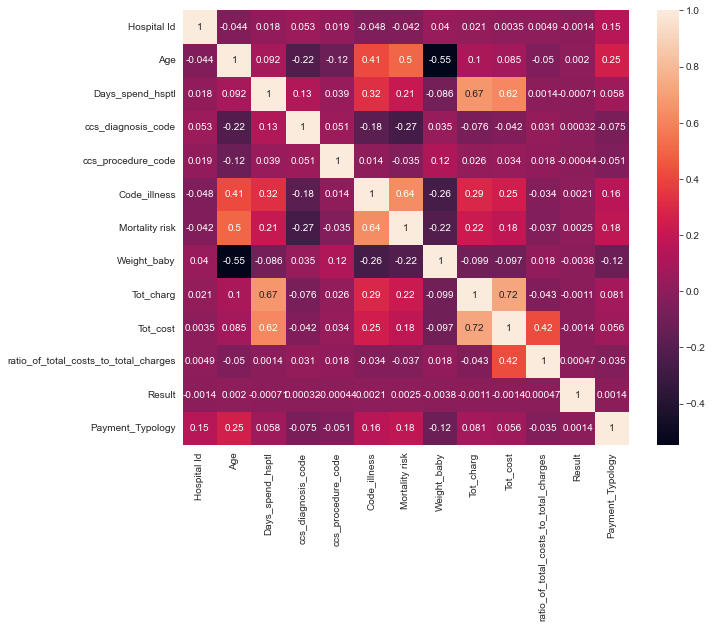

In [91]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

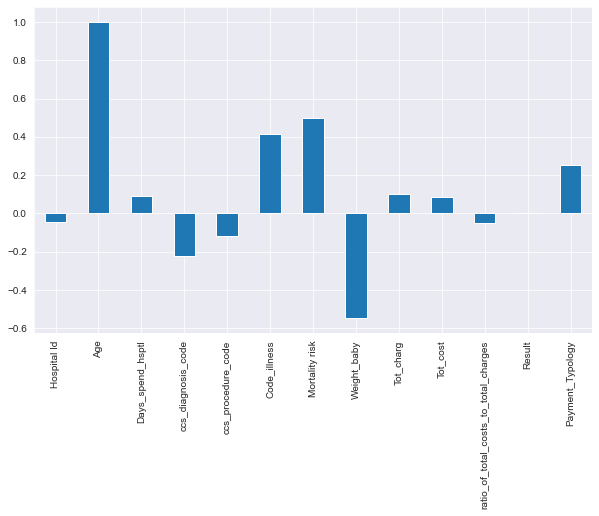

In [54]:
plt.figure(figsize=(10,6))
data.corr()['Age'].plot.bar()

<AxesSubplot:xlabel='Age', ylabel='Code_illness'>

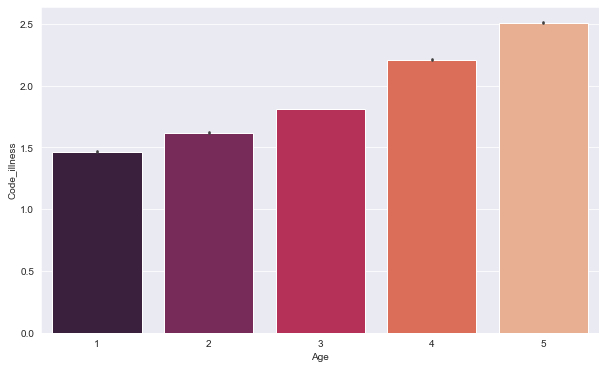

In [55]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='Code_illness',data=data,palette='rocket')

<AxesSubplot:xlabel='Age', ylabel='Mortality risk'>

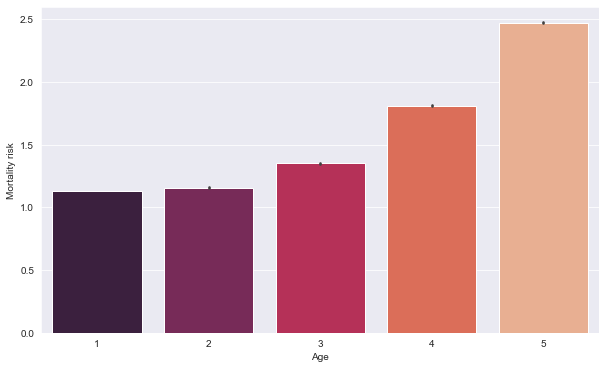

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='Mortality risk',data=data,palette='rocket')

In [57]:
data['Hospital Id'].nunique()

143

In [92]:
pd.set_option('display.max_columns', 500)

In [59]:
data

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,3,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,5,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,3,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,1,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,5,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,1169.0,5,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,29,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,1,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,231,Other infectious & parasitic diseases,2,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,4,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,Hepatic coma & other major acute liver disorders,4,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,3,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


In [60]:
data['apr_drg_description'].unique()

array(['Other pneumonia', 'Cellulitis & other skin infections',
       'Other digestive system diagnoses',
       'Other gastroenteritis, nausa & vomiting',
       'Bronchiolitis & RSV pneumonia',
       'Chronic obstructive pulmonary disease',
       'Infections of upper respiratory tract',
       'Kidney & urinary tract infections',
       'Respiratory signs, symptoms & minor diagnoses',
       'Intestinal obstruction',
       'Post-operative, post-traumatic, other device infections',
       'Diverticulitis & diverticulosis',
       'Other ear, nose, mouth,throat & cranial/facial diagnoses',
       'Major chest & respiratory trauma',
       'Other & unspecified gastrointestinal hemorrhage', 'Asthma',
       'Electrolyte disorders except hypovolemia related',
       'Malnutrition, failure to thrive & other nutritional disorders',
       'Hypovolemia & related electrolyte disorders',
       'Other injury, poisoning & toxic effect diagnoses',
       'Peripheral & other vascular disorder

<AxesSubplot:xlabel='Home or self care,', ylabel='count'>

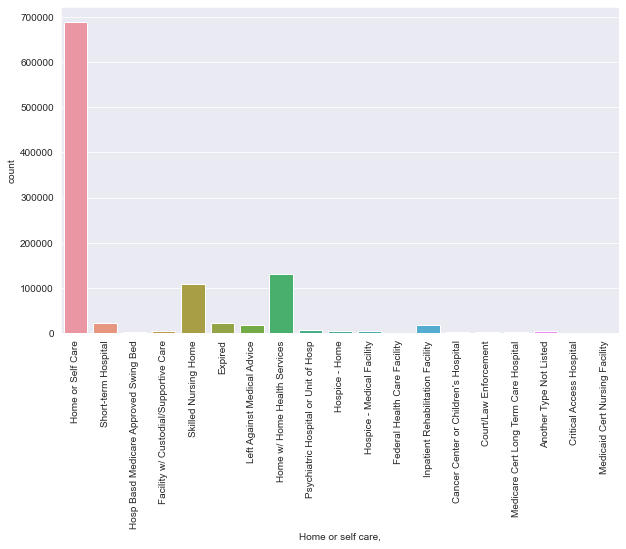

In [61]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='Home or self care,',data=data)

<AxesSubplot:xlabel='Home or self care,,Result'>

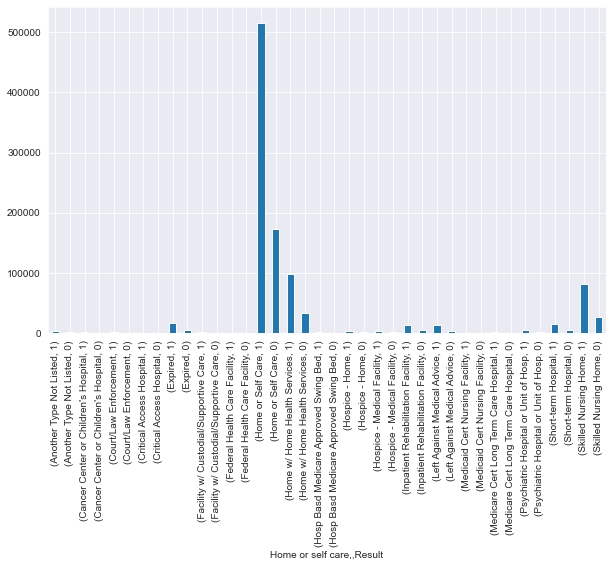

In [62]:
plt.figure(figsize=(10,6))
data.groupby('Home or self care,')['Result'].value_counts().plot.bar()

In [93]:
data['Abortion'].value_counts()

N    1041265
Name: Abortion, dtype: int64

In [63]:
data[['Tot_charg','Tot_cost','ratio_of_total_costs_to_total_charges']]

,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges
0,5511.95,5582.49,1.012798
1,4783.20,5162.82,1.079365
2,3829.15,4056.52,1.059379
3,1108.20,1644.75,1.484167
4,3418.18,3370.87,0.986161
...,...,...,...
1048570,69650.41,13896.82,0.199522
1048571,13587.38,3918.35,0.288382
1048572,104629.78,24746.64,0.236516
1048573,27521.41,6766.04,0.245846


<AxesSubplot:xlabel='Tot_charg', ylabel='Tot_cost'>

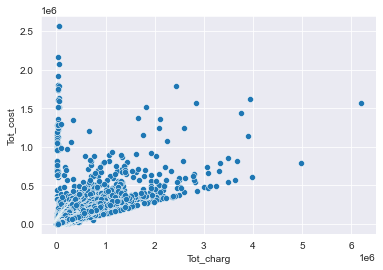

In [64]:
sns.scatterplot(x='Tot_charg',y='Tot_cost',data=data)

<AxesSubplot:xlabel='Tot_charg', ylabel='ratio_of_total_costs_to_total_charges'>

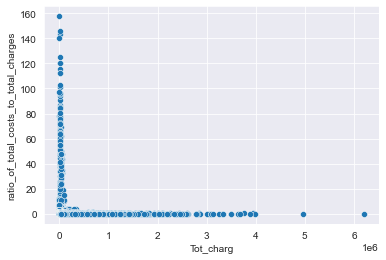

In [65]:
sns.scatterplot(x='Tot_charg',y='ratio_of_total_costs_to_total_charges',data=data)

<AxesSubplot:xlabel='Tot_cost', ylabel='ratio_of_total_costs_to_total_charges'>

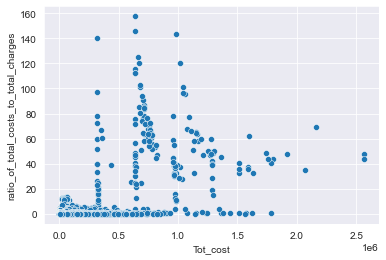

In [66]:
sns.scatterplot(x='Tot_cost',y='ratio_of_total_costs_to_total_charges',data=data)

## Outliers

In [67]:
from scipy import stats

<AxesSubplot:>

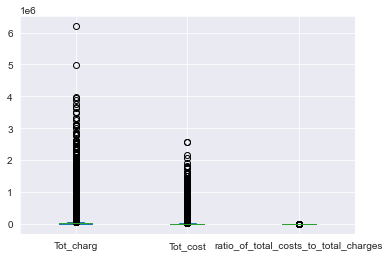

In [68]:
data[['Tot_charg','Tot_cost','ratio_of_total_costs_to_total_charges']].plot.box()

In [69]:
np.round(data['Tot_charg'].describe(),3)

count    1041265.000
mean       27218.911
std        55020.588
min            0.310
25%         7480.430
50%        14687.690
75%        29280.400
max      6196973.500
Name: Tot_charg, dtype: float64

In [70]:
np.round(data['Tot_cost'].describe(),3)

count    1041265.000
mean       10509.029
std        22343.517
min            0.100
25%         3264.680
50%         5962.550
75%        11389.900
max      2562477.660
Name: Tot_cost, dtype: float64

In [42]:
np.round(data['ratio_of_total_costs_to_total_charges'].describe(),3)

count    1041265.000
mean           0.456
std            0.803
min            0.033
25%            0.313
50%            0.409
75%            0.519
max          157.560
Name: ratio_of_total_costs_to_total_charges, dtype: float64

In [13]:
data['Zscore_1'] = stats.zscore(data['Tot_charg'])
data['Zscore_2'] = stats.zscore(data['Tot_cost'])
data['Zscore_3'] = stats.zscore(data['ratio_of_total_costs_to_total_charges'])

In [14]:
data = data[data['Zscore_1']<3]

In [15]:
data = data[data['Zscore_2']<3]

In [16]:
data = data[data['Zscore_3']<3]

<AxesSubplot:>

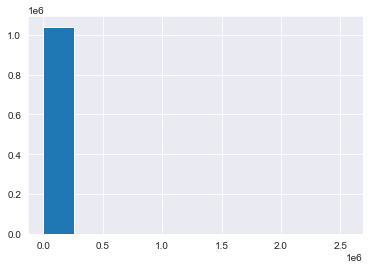

In [72]:
data['Tot_cost'].hist()

<AxesSubplot:>

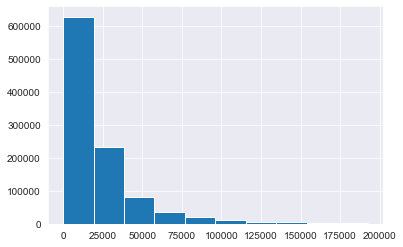

In [48]:
data['Tot_charg'].hist()

<AxesSubplot:>

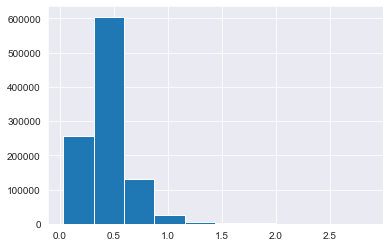

In [49]:
data['ratio_of_total_costs_to_total_charges'].hist()

In [51]:
data = data.drop(['Zscore_1','Zscore_2','Zscore_3'],axis =1)

<AxesSubplot:xlabel='Result', ylabel='count'>

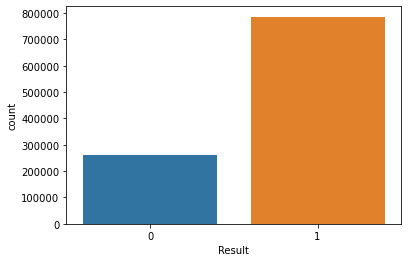

In [7]:
sns.countplot(x='Result',data=data)

In [71]:
data.to_csv('Cleaned_Insuarance_1')